<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

Dylon Wang Yin Chong DS01 S10263199B

In [1]:
# import the pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### Step 1: Load and Explore the Data

### Player details

In [2]:
df_player = pd.read_csv('Datasets/CSV/player.csv')
df_player

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
18842,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
18843,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
18844,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


In [3]:
df_player.shape

(18846, 24)

In [4]:
df_player.dtypes

player_id         object
birth_year       float64
birth_month      float64
birth_day        float64
birth_country     object
birth_state       object
birth_city        object
death_year       float64
death_month      float64
death_day        float64
death_country     object
death_state       object
death_city        object
name_first        object
name_last         object
name_given        object
weight           float64
height           float64
bats              object
throws            object
debut             object
final_game        object
retro_id          object
bbref_id          object
dtype: object

### Step 2: Data Wrangling on multiple tables 

### Step 2.1 : Data Wrangling on player table

In [5]:
df_player.isna().sum()

player_id           0
birth_year        143
birth_month       315
birth_day         464
birth_country      73
birth_state       626
birth_city        199
death_year       9510
death_month      9511
death_day        9512
death_country    9517
death_state      9569
death_city       9521
name_first         39
name_last           0
name_given         39
weight            871
height            805
bats             1191
throws            978
debut             193
final_game        193
retro_id           54
bbref_id            1
dtype: int64

Select only required columns

In [6]:
df_player = df_player[['player_id', 'birth_country',
                       'weight', 'height', 'bats', 'throws']]
df_player

,player_id,birth_country,weight,height,bats,throws
0,aardsda01,USA,220.0,75.0,R,R
1,aaronha01,USA,180.0,72.0,R,R
2,aaronto01,USA,190.0,75.0,R,R
3,aasedo01,USA,190.0,75.0,R,R
4,abadan01,USA,184.0,73.0,L,L
...,...,...,...,...,...,...
18841,zupofr01,USA,182.0,71.0,L,R
18842,zuvelpa01,USA,173.0,72.0,R,R
18843,zuverge01,USA,195.0,76.0,R,R
18844,zwilldu01,USA,160.0,66.0,L,L


In [7]:
df_player.duplicated().sum()  # No duplicates

0

In [8]:
df_player.isna().sum()

player_id           0
birth_country      73
weight            871
height            805
bats             1191
throws            978
dtype: int64

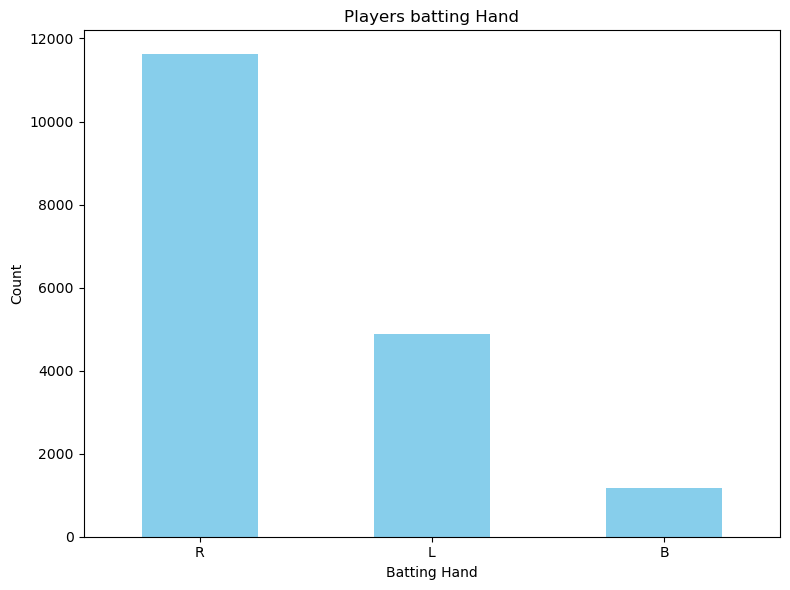

In [9]:
plt.figure(figsize=(8, 6))
df_player['bats'].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Players batting Hand')
plt.xlabel('Batting Hand')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

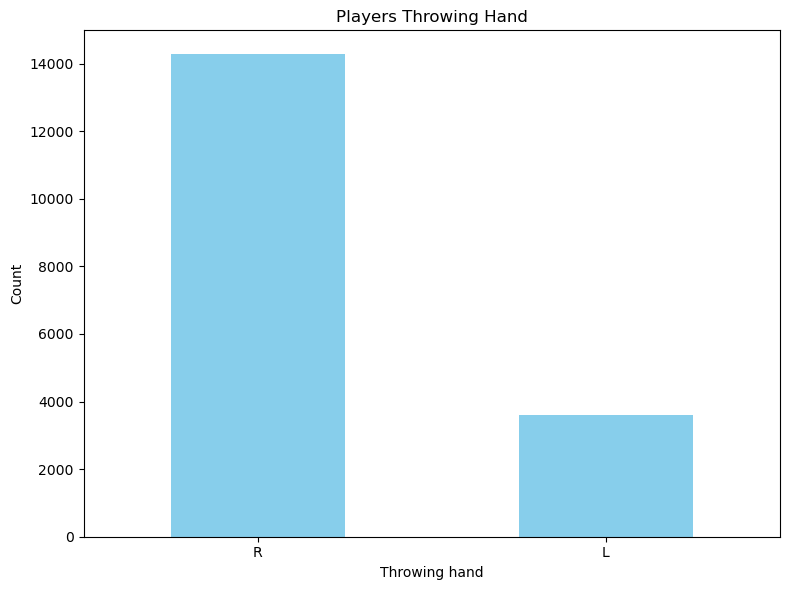

In [10]:
plt.figure(figsize=(8, 6))
df_player['throws'].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Players Throwing Hand')
plt.xlabel('Throwing hand')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

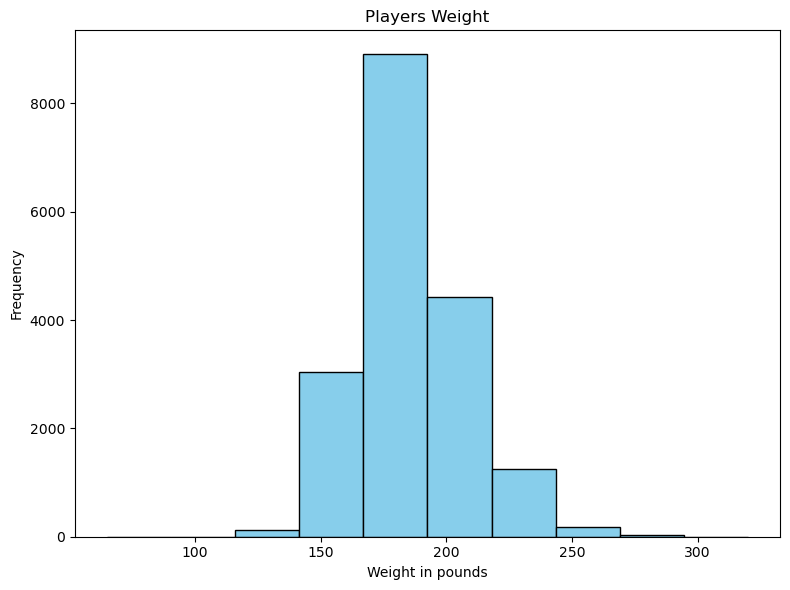

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df_player['weight'], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Players Weight')
plt.xlabel('Weight in pounds')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

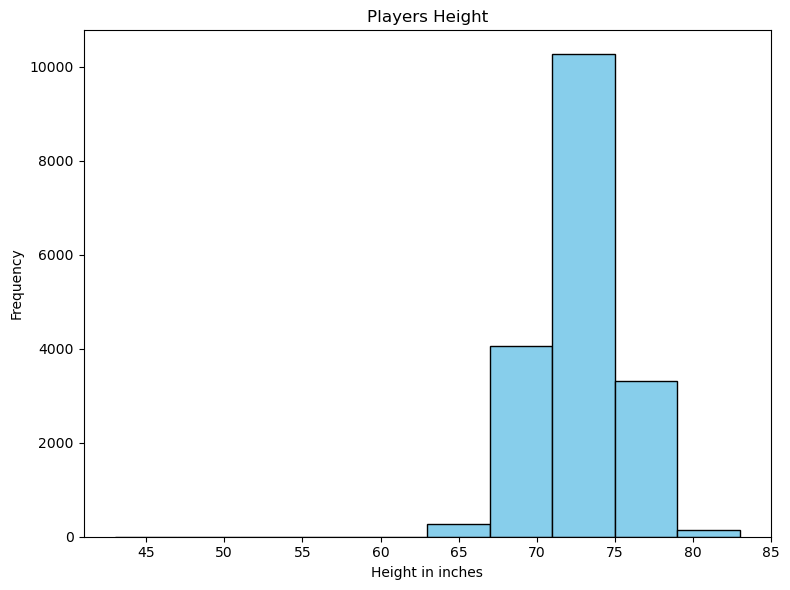

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df_player['height'], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Players Height')
plt.xlabel('Height in inches')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Player Salary

In [13]:
df_salary = pd.read_csv('Datasets/CSV/salary.csv')
df_salary

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [14]:
df_salary.shape

(25575, 5)

In [15]:
df_salary.dtypes

year          int64
team_id      object
league_id    object
player_id    object
salary        int64
dtype: object

### Step 2.2 : Data Wrangling on salary table

In [16]:
df_salary.isna().sum() # No missing values

year         0
team_id      0
league_id    0
player_id    0
salary       0
dtype: int64

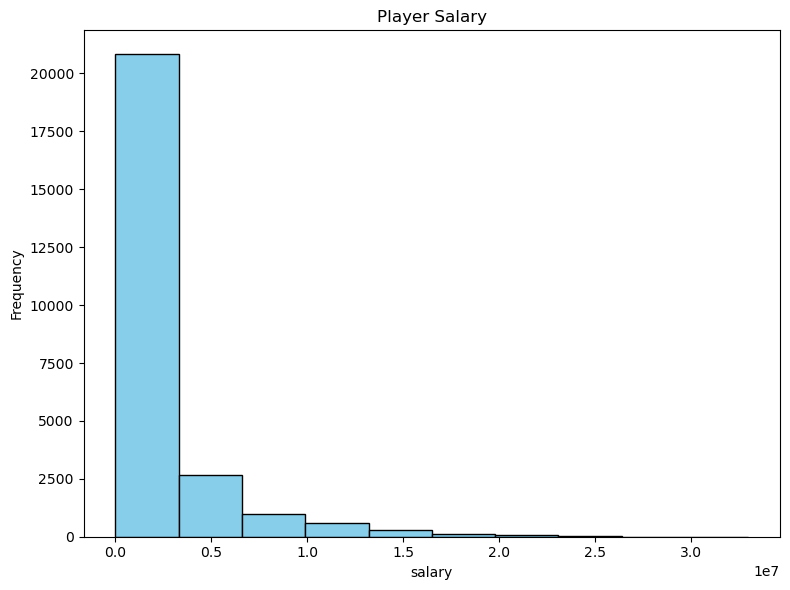

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df_salary['salary'], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Player Salary')
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

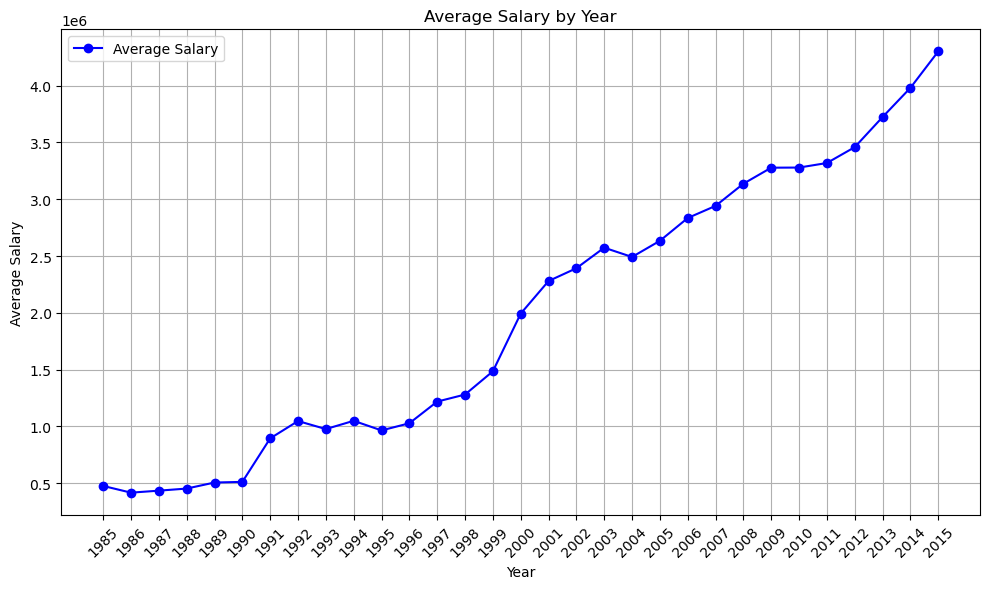

In [18]:
# Calculate the average salary by year
salary_avg_by_year = df_salary.groupby('year')['salary'].mean()

# Plotting the average salary by year
plt.figure(figsize=(10, 6))
plt.plot(salary_avg_by_year.index, salary_avg_by_year.values, 
         marker='o', linestyle='-', color='b', label='Average Salary')
plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.xticks(salary_avg_by_year.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

* for the modelling, we will only be using the latest year's salaries

Select only the latest data (2013, 2014 and 2015)

In [19]:
df_salary = df_salary[df_salary['year'].isin([2013, 2014, 2015])]
df_salary = df_salary.reset_index()
df_salary = df_salary.drop(columns = 'index')
df_salary

,year,team_id,league_id,player_id,salary
0,2013,ARI,NL,bellhe01,10000000
1,2013,ARI,NL,bloomwi01,1900000
2,2013,ARI,NL,cahiltr01,5700000
3,2013,ARI,NL,campato01,497500
4,2013,ARI,NL,chaveer01,3000000
...,...,...,...,...,...
2429,2015,WAS,NL,treinbl01,512800
2430,2015,WAS,NL,ugglada01,507500
2431,2015,WAS,NL,werthja01,21000000
2432,2015,WAS,NL,zimmejo02,16500000


### Batting Performances

In [20]:
df_batting = pd.read_csv('Datasets/CSV/batting.csv')
df_batting

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [21]:
df_batting.shape

(101332, 22)

In [22]:
df_batting.dtypes

player_id     object
year           int64
stint          int64
team_id       object
league_id     object
g              int64
ab           float64
r            float64
h            float64
double       float64
triple       float64
hr           float64
rbi          float64
sb           float64
cs           float64
bb           float64
so           float64
ibb          float64
hbp          float64
sh           float64
sf           float64
g_idp        float64
dtype: object

### Step 2.3 : Data Wrangling on batting table

Change the column names

In [23]:
df_batting.rename(columns = {'g':'batting_g'}, inplace = True)

In [24]:
df_batting.isna().sum()

player_id        0
year             0
stint            0
team_id          0
league_id      737
batting_g        0
ab            5149
r             5149
h             5149
double        5149
triple        5149
hr            5149
rbi           5573
sb            6449
cs           28603
bb            5149
so           12987
ibb          41712
hbp           7959
sh           11487
sf           41181
g_idp        31257
dtype: int64

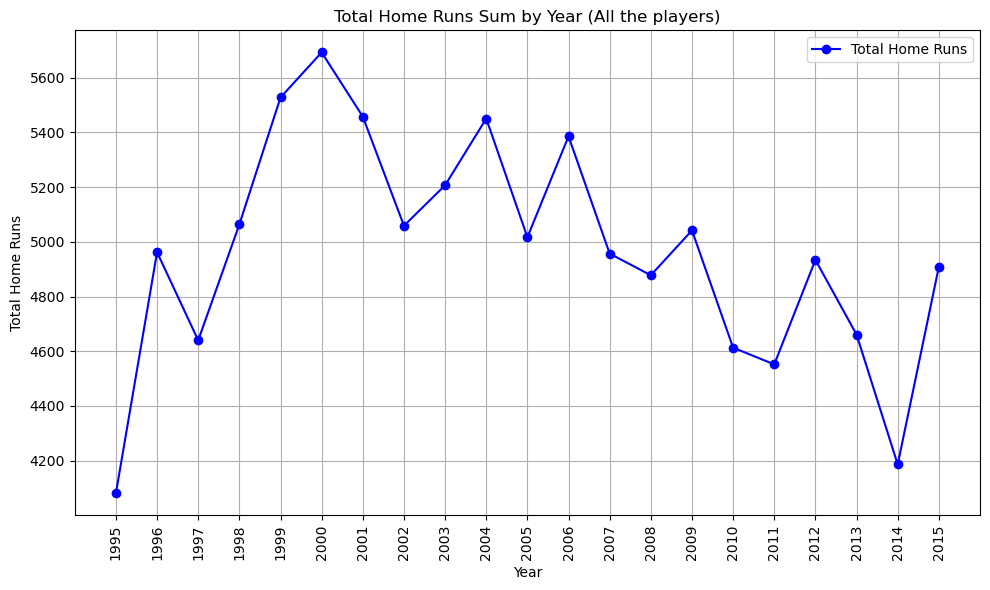

In [25]:
### for this visualization, we use data starting from 1995

df_batting_selected = df_batting[df_batting['year'] >= 1995]

HR_sum_by_year = df_batting_selected.groupby('year')['hr'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(HR_sum_by_year.index, HR_sum_by_year.values, 
         marker='o', linestyle='-', color='b', label='Total Home Runs')
plt.title('Total Home Runs Sum by Year (All the players)')
plt.xlabel('Year')
plt.ylabel('Total Home Runs')
plt.xticks(HR_sum_by_year.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Select only the latest data (2013, 2014 and 2015)

In [26]:
df_batting = df_batting[df_batting['year'].isin([2013, 2014, 2015])]

In [27]:
df_batting.isna().sum() # No missing values

player_id    0
year         0
stint        0
team_id      0
league_id    0
batting_g    0
ab           0
r            0
h            0
double       0
triple       0
hr           0
rbi          0
sb           0
cs           0
bb           0
so           0
ibb          0
hbp          0
sh           0
sf           0
g_idp        0
dtype: int64

In [28]:
df_batting = df_batting.reset_index()
df_batting = df_batting.drop(columns = 'index')
df_batting

,player_id,year,stint,team_id,league_id,batting_g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,aardsda01,2013,1,NYN,NL,43,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abadfe01,2013,1,WAS,NL,39,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abreuto01,2013,1,SFN,NL,53,138.0,21.0,37.0,12.0,...,14.0,0.0,2.0,6.0,33.0,1.0,1.0,1.0,1.0,5.0
3,aceveal01,2013,1,BOS,AL,11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ackledu01,2013,1,SEA,AL,113,384.0,40.0,97.0,18.0,...,31.0,2.0,3.0,37.0,72.0,1.0,1.0,4.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4326,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
4327,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
4328,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


### Fielding Performances

In [29]:
df_fielding = pd.read_csv('Datasets/CSV/fielding.csv')
df_fielding

,player_id,year,stint,team_id,league_id,pos,g,gs,inn_outs,po,a,e,dp,pb,wp,sb,cs,zr
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67.0,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8.0,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170521,younger03,2015,1,ATL,NL,OF,22,NaN,NaN,45.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
170522,younger03,2015,2,NYN,NL,OF,7,NaN,NaN,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
170523,zimmery01,2015,1,WAS,NL,OF,1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
170524,zobribe01,2015,1,OAK,AL,OF,29,NaN,NaN,39.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN


In [30]:
df_fielding.shape

(170526, 18)

In [31]:
df_fielding.dtypes

player_id     object
year           int64
stint          int64
team_id       object
league_id     object
pos           object
g              int64
gs           float64
inn_outs     float64
po           float64
a            float64
e            float64
dp           float64
pb           float64
wp           float64
sb           float64
cs           float64
zr           float64
dtype: object

### Step 2.4 : Data Wrangling on fielding table

Rename column names

In [32]:
df_fielding.rename(columns = {'g':'fielding_g'}, inplace = True)

In [33]:
df_fielding.isna().sum()

player_id          0
year               0
stint              0
team_id            0
league_id       1503
pos                0
fielding_g         0
gs             94677
inn_outs       68213
po             14117
a              14118
e              14119
dp             14118
pb            159410
wp            166337
sb            164502
cs            164502
zr            166337
dtype: int64

Select only the latest data (2013, 2014 and 2015)

In [34]:
df_fielding = df_fielding[df_fielding['year'].isin([2013, 2014, 2015])]

In [35]:
df_fielding.isna().sum()

player_id        0
year             0
stint            0
team_id          0
league_id        0
pos              0
fielding_g       0
gs            7490
inn_outs      3811
po            1256
a             1256
e             1256
dp            1256
pb            7138
wp            7490
sb            7138
cs            7138
zr            7490
dtype: int64

Drop variables which have more than 40% missing values

In [36]:
df_fielding = df_fielding[['player_id', 'year', 'stint', 'team_id', 'league_id', 'pos', 'fielding_g',
       'inn_outs', 'po', 'a', 'e', 'dp']]
df_fielding = df_fielding.reset_index()
df_fielding = df_fielding.drop(columns = 'index')
df_fielding

,player_id,year,stint,team_id,league_id,pos,fielding_g,inn_outs,po,a,e,dp
0,aardsda01,2013,1,NYN,NL,P,43,120.0,1.0,5.0,0.0,0.0
1,abadfe01,2013,1,WAS,NL,P,39,114.0,1.0,4.0,0.0,0.0
2,abreuto01,2013,1,SFN,NL,2B,30,660.0,45.0,57.0,2.0,15.0
3,abreuto01,2013,1,SFN,NL,3B,3,39.0,0.0,2.0,0.0,0.0
4,abreuto01,2013,1,SFN,NL,SS,3,54.0,2.0,7.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,younger03,2015,1,ATL,NL,OF,22,NaN,45.0,0.0,0.0,0.0
7486,younger03,2015,2,NYN,NL,OF,7,NaN,5.0,0.0,0.0,0.0
7487,zimmery01,2015,1,WAS,NL,OF,1,NaN,0.0,0.0,0.0,0.0
7488,zobribe01,2015,1,OAK,AL,OF,29,NaN,39.0,0.0,3.0,0.0


In [37]:
df_fielding.isna().sum()

player_id        0
year             0
stint            0
team_id          0
league_id        0
pos              0
fielding_g       0
inn_outs      3811
po            1256
a             1256
e             1256
dp            1256
dtype: int64

* There are still some missing values under some columns. Those will be removed later on.

### Awards

In [38]:
df_player_award = pd.read_csv('Datasets/CSV/player_award.csv')
df_player_award

,player_id,award_id,year,league_id,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN
...,...,...,...,...,...,...
6073,mccutan01,Silver Slugger,2015,NL,NaN,OF
6074,bumgama01,Silver Slugger,2015,NL,NaN,P
6075,crawfbr01,Silver Slugger,2015,NL,NaN,SS
6076,donaljo02,TSN Major League Player of the Year,2015,ML,NaN,NaN


In [39]:
df_player_award.shape

(6078, 6)

In [40]:
df_player_award.dtypes

player_id    object
award_id     object
year          int64
league_id    object
tie          object
notes        object
dtype: object

### Step 2.5 : Data Wrangling on Award table

In [41]:
df_player_award.isna().sum()

player_id       0
award_id        0
year            0
league_id       0
tie          6033
notes        1430
dtype: int64

Drop the "tie" variable which has more than 90% missing values

In [42]:
df_player_award = df_player_award[['player_id', 'year', 'award_id', 'league_id', 'notes']]
df_player_award

,player_id,year,award_id,league_id,notes
0,bondto01,1877,Pitching Triple Crown,NL,NaN
1,hinespa01,1878,Triple Crown,NL,NaN
2,heckegu01,1884,Pitching Triple Crown,AA,NaN
3,radboch01,1884,Pitching Triple Crown,NL,NaN
4,oneilti01,1887,Triple Crown,AA,NaN
...,...,...,...,...,...
6073,mccutan01,2015,Silver Slugger,NL,OF
6074,bumgama01,2015,Silver Slugger,NL,P
6075,crawfbr01,2015,Silver Slugger,NL,SS
6076,donaljo02,2015,TSN Major League Player of the Year,ML,NaN


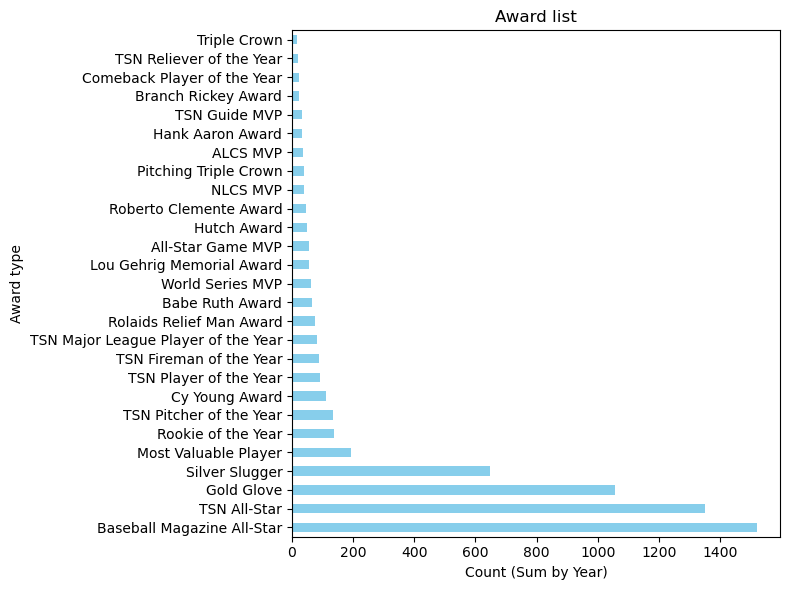

In [43]:
plt.figure(figsize=(8, 6))
df_player_award['award_id'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Award list')
plt.ylabel('Award type')
plt.xlabel('Count (Sum by Year)')
plt.tight_layout()
plt.show()

Select only the latest data (2013, 2014 and 2015)

In [44]:
df_player_award = df_player_award[df_player_award['year'].isin([2013, 2014, 2015])]
df_player_award = df_player_award.reset_index()
df_player_award = df_player_award.drop(columns = 'index')
df_player_award

,player_id,year,award_id,league_id,notes
0,ueharko01,2013,ALCS MVP,AL,NaN
1,riverma01,2013,All-Star Game MVP,NL,NaN
2,kershcl01,2013,Branch Rickey Award,ML,NaN
3,riverma01,2013,Comeback Player of the Year,AL,NaN
4,liriafr01,2013,Comeback Player of the Year,NL,NaN
...,...,...,...,...,...
154,mccutan01,2015,Silver Slugger,NL,OF
155,bumgama01,2015,Silver Slugger,NL,P
156,crawfbr01,2015,Silver Slugger,NL,SS
157,donaljo02,2015,TSN Major League Player of the Year,ML,NaN


In [45]:
df_player_award.isna().sum()

player_id     0
year          0
award_id      0
league_id     0
notes        51
dtype: int64

### Step 3: Data Cleansing and Transformation

### Merge files

In [46]:
df_merge_01 = pd.merge(df_salary, df_player, on = ['player_id'], how = 'inner')
df_merge_01

,year,team_id,league_id,player_id,salary,birth_country,weight,height,bats,throws
0,2013,ARI,NL,bellhe01,10000000,USA,235.0,75.0,R,R
1,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R
2,2013,ARI,NL,cahiltr01,5700000,USA,240.0,76.0,R,R
3,2013,ARI,NL,campato01,497500,USA,165.0,68.0,L,L
4,2013,ARI,NL,chaveer01,3000000,USA,215.0,73.0,L,R
...,...,...,...,...,...,...,...,...,...,...
2421,2015,WAS,NL,treinbl01,512800,USA,230.0,77.0,R,R
2422,2015,WAS,NL,ugglada01,507500,USA,210.0,71.0,R,R
2423,2015,WAS,NL,werthja01,21000000,USA,240.0,77.0,R,R
2424,2015,WAS,NL,zimmejo02,16500000,USA,225.0,74.0,R,R


In [47]:
df_merge_02 = pd.merge(df_merge_01, df_player_award, on = ['player_id', 'year', 'league_id'], how = 'left')
df_merge_02['award_id'] = df_merge_02['award_id'].fillna('No award')
df_merge_02

,year,team_id,league_id,player_id,salary,birth_country,weight,height,bats,throws,award_id,notes
0,2013,ARI,NL,bellhe01,10000000,USA,235.0,75.0,R,R,No award,NaN
1,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,No award,NaN
2,2013,ARI,NL,cahiltr01,5700000,USA,240.0,76.0,R,R,No award,NaN
3,2013,ARI,NL,campato01,497500,USA,165.0,68.0,L,L,No award,NaN
4,2013,ARI,NL,chaveer01,3000000,USA,215.0,73.0,L,R,No award,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2015,WAS,NL,treinbl01,512800,USA,230.0,77.0,R,R,No award,NaN
2449,2015,WAS,NL,ugglada01,507500,USA,210.0,71.0,R,R,No award,NaN
2450,2015,WAS,NL,werthja01,21000000,USA,240.0,77.0,R,R,No award,NaN
2451,2015,WAS,NL,zimmejo02,16500000,USA,225.0,74.0,R,R,No award,NaN


In [48]:
df_merge_03 = pd.merge(df_merge_02, df_fielding, on = ['player_id', 'year',
                                                      'team_id', 'league_id'], how = 'left')
df_merge_03

,year,team_id,league_id,player_id,salary,birth_country,weight,height,bats,throws,award_id,notes,stint,pos,fielding_g,inn_outs,po,a,e,dp
0,2013,ARI,NL,bellhe01,10000000,USA,235.0,75.0,R,R,No award,NaN,1.0,P,69.0,198.0,8.0,7.0,1.0,1.0
1,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,No award,NaN,1.0,2B,15.0,408.0,32.0,37.0,0.0,10.0
2,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,No award,NaN,1.0,LF,7.0,NaN,NaN,NaN,NaN,NaN
3,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,No award,NaN,1.0,OF,7.0,165.0,9.0,0.0,0.0,0.0
4,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,No award,NaN,1.0,SS,9.0,222.0,12.0,29.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,2015,WAS,NL,werthja01,21000000,USA,240.0,77.0,R,R,No award,NaN,1.0,OF,86.0,NaN,113.0,3.0,2.0,0.0
4323,2015,WAS,NL,zimmejo02,16500000,USA,225.0,74.0,R,R,No award,NaN,1.0,P,33.0,NaN,16.0,29.0,2.0,1.0
4324,2015,WAS,NL,zimmery01,14000000,USA,220.0,75.0,R,R,No award,NaN,1.0,1B,93.0,NaN,726.0,49.0,4.0,63.0
4325,2015,WAS,NL,zimmery01,14000000,USA,220.0,75.0,R,R,No award,NaN,1.0,LF,1.0,NaN,NaN,NaN,NaN,NaN


In [49]:
df_merge_04 = pd.merge(df_merge_03, df_batting, on = ['player_id', 'year',
                                                      'team_id', 'league_id', 'stint'], how = 'left')
df_merge_04

,year,team_id,league_id,player_id,salary,birth_country,weight,height,bats,throws,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,2013,ARI,NL,bellhe01,10000000,USA,235.0,75.0,R,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
2,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
3,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
4,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,2015,WAS,NL,werthja01,21000000,USA,240.0,77.0,R,R,...,42.0,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0
4323,2015,WAS,NL,zimmejo02,16500000,USA,225.0,74.0,R,R,...,3.0,0.0,0.0,0.0,18.0,0.0,0.0,6.0,0.0,0.0
4324,2015,WAS,NL,zimmery01,14000000,USA,220.0,75.0,R,R,...,73.0,1.0,0.0,33.0,79.0,0.0,1.0,0.0,10.0,13.0
4325,2015,WAS,NL,zimmery01,14000000,USA,220.0,75.0,R,R,...,73.0,1.0,0.0,33.0,79.0,0.0,1.0,0.0,10.0,13.0


Variable type conversion

In [50]:
df_merge_04['stint'] = df_merge_04['stint'].astype(object)

In [51]:
df_merge_04.isna().sum()

year                0
team_id             0
league_id           0
player_id           0
salary              0
birth_country       0
weight              0
height              0
bats                0
throws              0
award_id            0
notes            4145
stint              16
pos                16
fielding_g         16
inn_outs         2185
po                729
a                 729
e                 729
dp                729
batting_g          16
ab                 16
r                  16
h                  16
double             16
triple             16
hr                 16
rbi                16
sb                 16
cs                 16
bb                 16
so                 16
ibb                16
hbp                16
sh                 16
sf                 16
g_idp              16
dtype: int64

Drop columns which have more than 50% missing values

In [52]:
df_merge_04.drop(columns = ['notes', 'inn_outs'], inplace = True)

In [53]:
df_merge_04.isna().sum()

year               0
team_id            0
league_id          0
player_id          0
salary             0
birth_country      0
weight             0
height             0
bats               0
throws             0
award_id           0
stint             16
pos               16
fielding_g        16
po               729
a                729
e                729
dp               729
batting_g         16
ab                16
r                 16
h                 16
double            16
triple            16
hr                16
rbi               16
sb                16
cs                16
bb                16
so                16
ibb               16
hbp               16
sh                16
sf                16
g_idp             16
dtype: int64

Drop all other missing values

In [54]:
df_merge_04 = df_merge_04.dropna()

In [55]:
df_merge_04.shape

(3598, 35)

In [56]:
df_merge_04.isna().sum()

year             0
team_id          0
league_id        0
player_id        0
salary           0
birth_country    0
weight           0
height           0
bats             0
throws           0
award_id         0
stint            0
pos              0
fielding_g       0
po               0
a                0
e                0
dp               0
batting_g        0
ab               0
r                0
h                0
double           0
triple           0
hr               0
rbi              0
sb               0
cs               0
bb               0
so               0
ibb              0
hbp              0
sh               0
sf               0
g_idp            0
dtype: int64

In [57]:
df_merge_04

,year,team_id,league_id,player_id,salary,birth_country,weight,height,bats,throws,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,2013,ARI,NL,bellhe01,10000000,USA,235.0,75.0,R,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
3,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
4,2013,ARI,NL,bloomwi01,1900000,USA,200.0,71.0,R,R,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
5,2013,ARI,NL,cahiltr01,5700000,USA,240.0,76.0,R,R,...,5.0,0.0,0.0,0.0,20.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,2015,WAS,NL,ugglada01,507500,USA,210.0,71.0,R,R,...,16.0,0.0,1.0,19.0,40.0,0.0,1.0,0.0,1.0,3.0
4322,2015,WAS,NL,werthja01,21000000,USA,240.0,77.0,R,R,...,42.0,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0
4323,2015,WAS,NL,zimmejo02,16500000,USA,225.0,74.0,R,R,...,3.0,0.0,0.0,0.0,18.0,0.0,0.0,6.0,0.0,0.0
4324,2015,WAS,NL,zimmery01,14000000,USA,220.0,75.0,R,R,...,73.0,1.0,0.0,33.0,79.0,0.0,1.0,0.0,10.0,13.0


In [58]:
df_merge_04.columns

Index(['year', 'team_id', 'league_id', 'player_id', 'salary', 'birth_country',
       'weight', 'height', 'bats', 'throws', 'award_id', 'stint', 'pos',
       'fielding_g', 'po', 'a', 'e', 'dp', 'batting_g', 'ab', 'r', 'h',
       'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp',
       'sh', 'sf', 'g_idp'],
      dtype='object')

Drop ID type columns before fitting the models

In [59]:
final_merged = df_merge_04[['year', 'salary', 'birth_country',
       'weight', 'height', 'bats', 'throws', 'award_id', 'stint', 'pos',
       'fielding_g', 'po', 'a', 'e', 'dp', 'batting_g', 'ab', 'r', 'h',
       'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp',
       'sh', 'sf', 'g_idp']]
final_merged

,year,salary,birth_country,weight,height,bats,throws,award_id,stint,pos,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,2013,10000000,USA,235.0,75.0,R,R,No award,1.0,P,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,1900000,USA,200.0,71.0,R,R,No award,1.0,2B,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
3,2013,1900000,USA,200.0,71.0,R,R,No award,1.0,OF,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
4,2013,1900000,USA,200.0,71.0,R,R,No award,1.0,SS,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
5,2013,5700000,USA,240.0,76.0,R,R,No award,1.0,P,...,5.0,0.0,0.0,0.0,20.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,2015,507500,USA,210.0,71.0,R,R,No award,1.0,2B,...,16.0,0.0,1.0,19.0,40.0,0.0,1.0,0.0,1.0,3.0
4322,2015,21000000,USA,240.0,77.0,R,R,No award,1.0,OF,...,42.0,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0
4323,2015,16500000,USA,225.0,74.0,R,R,No award,1.0,P,...,3.0,0.0,0.0,0.0,18.0,0.0,0.0,6.0,0.0,0.0
4324,2015,14000000,USA,220.0,75.0,R,R,No award,1.0,1B,...,73.0,1.0,0.0,33.0,79.0,0.0,1.0,0.0,10.0,13.0


<function matplotlib.pyplot.show(close=None, block=None)>

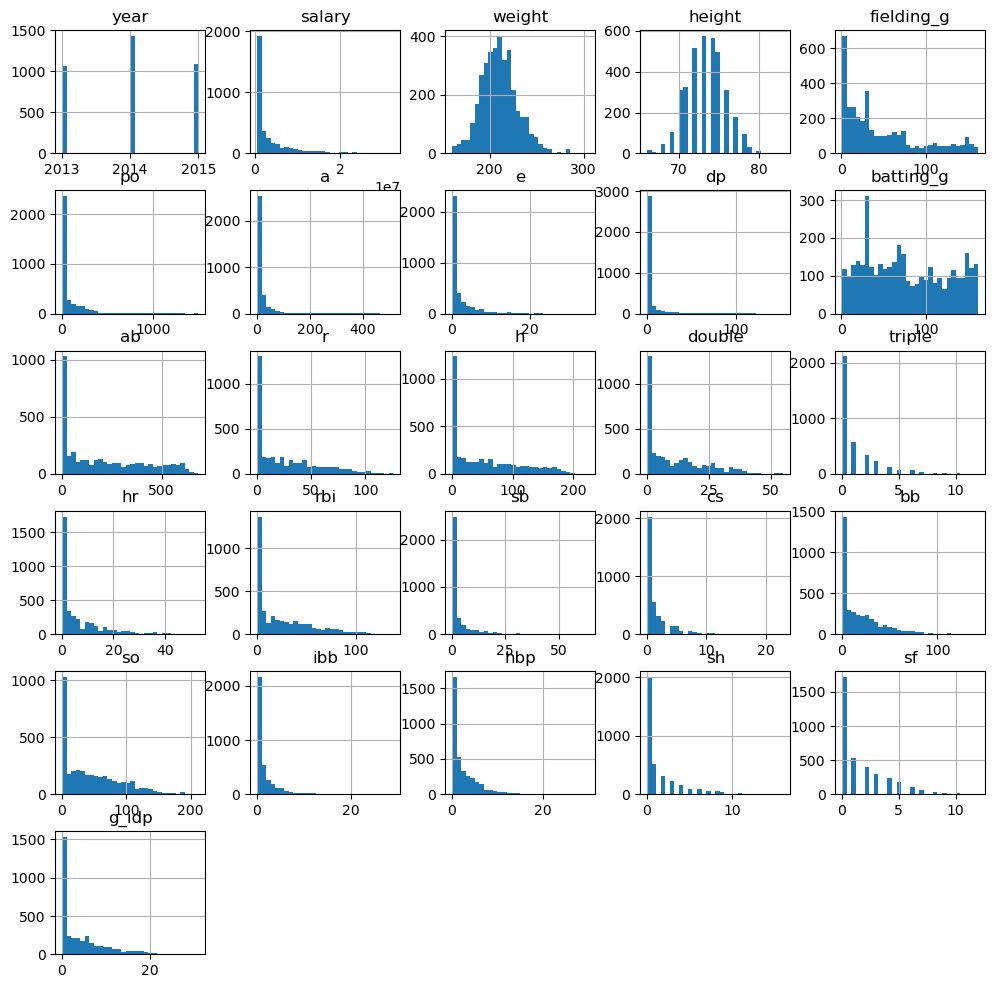

In [60]:
final_merged.hist(bins=30, figsize=(12,12))
plt.show

Check for outliers

In [61]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else 
                                  (upper_bound if x > upper_bound else x))

    return df

Select only the quantitative columns

In [62]:
quantitative_columns = final_merged.select_dtypes(include=['int64', 'float64']).columns
quantitative_columns = quantitative_columns.drop('salary')  # Exclude 'salary' column

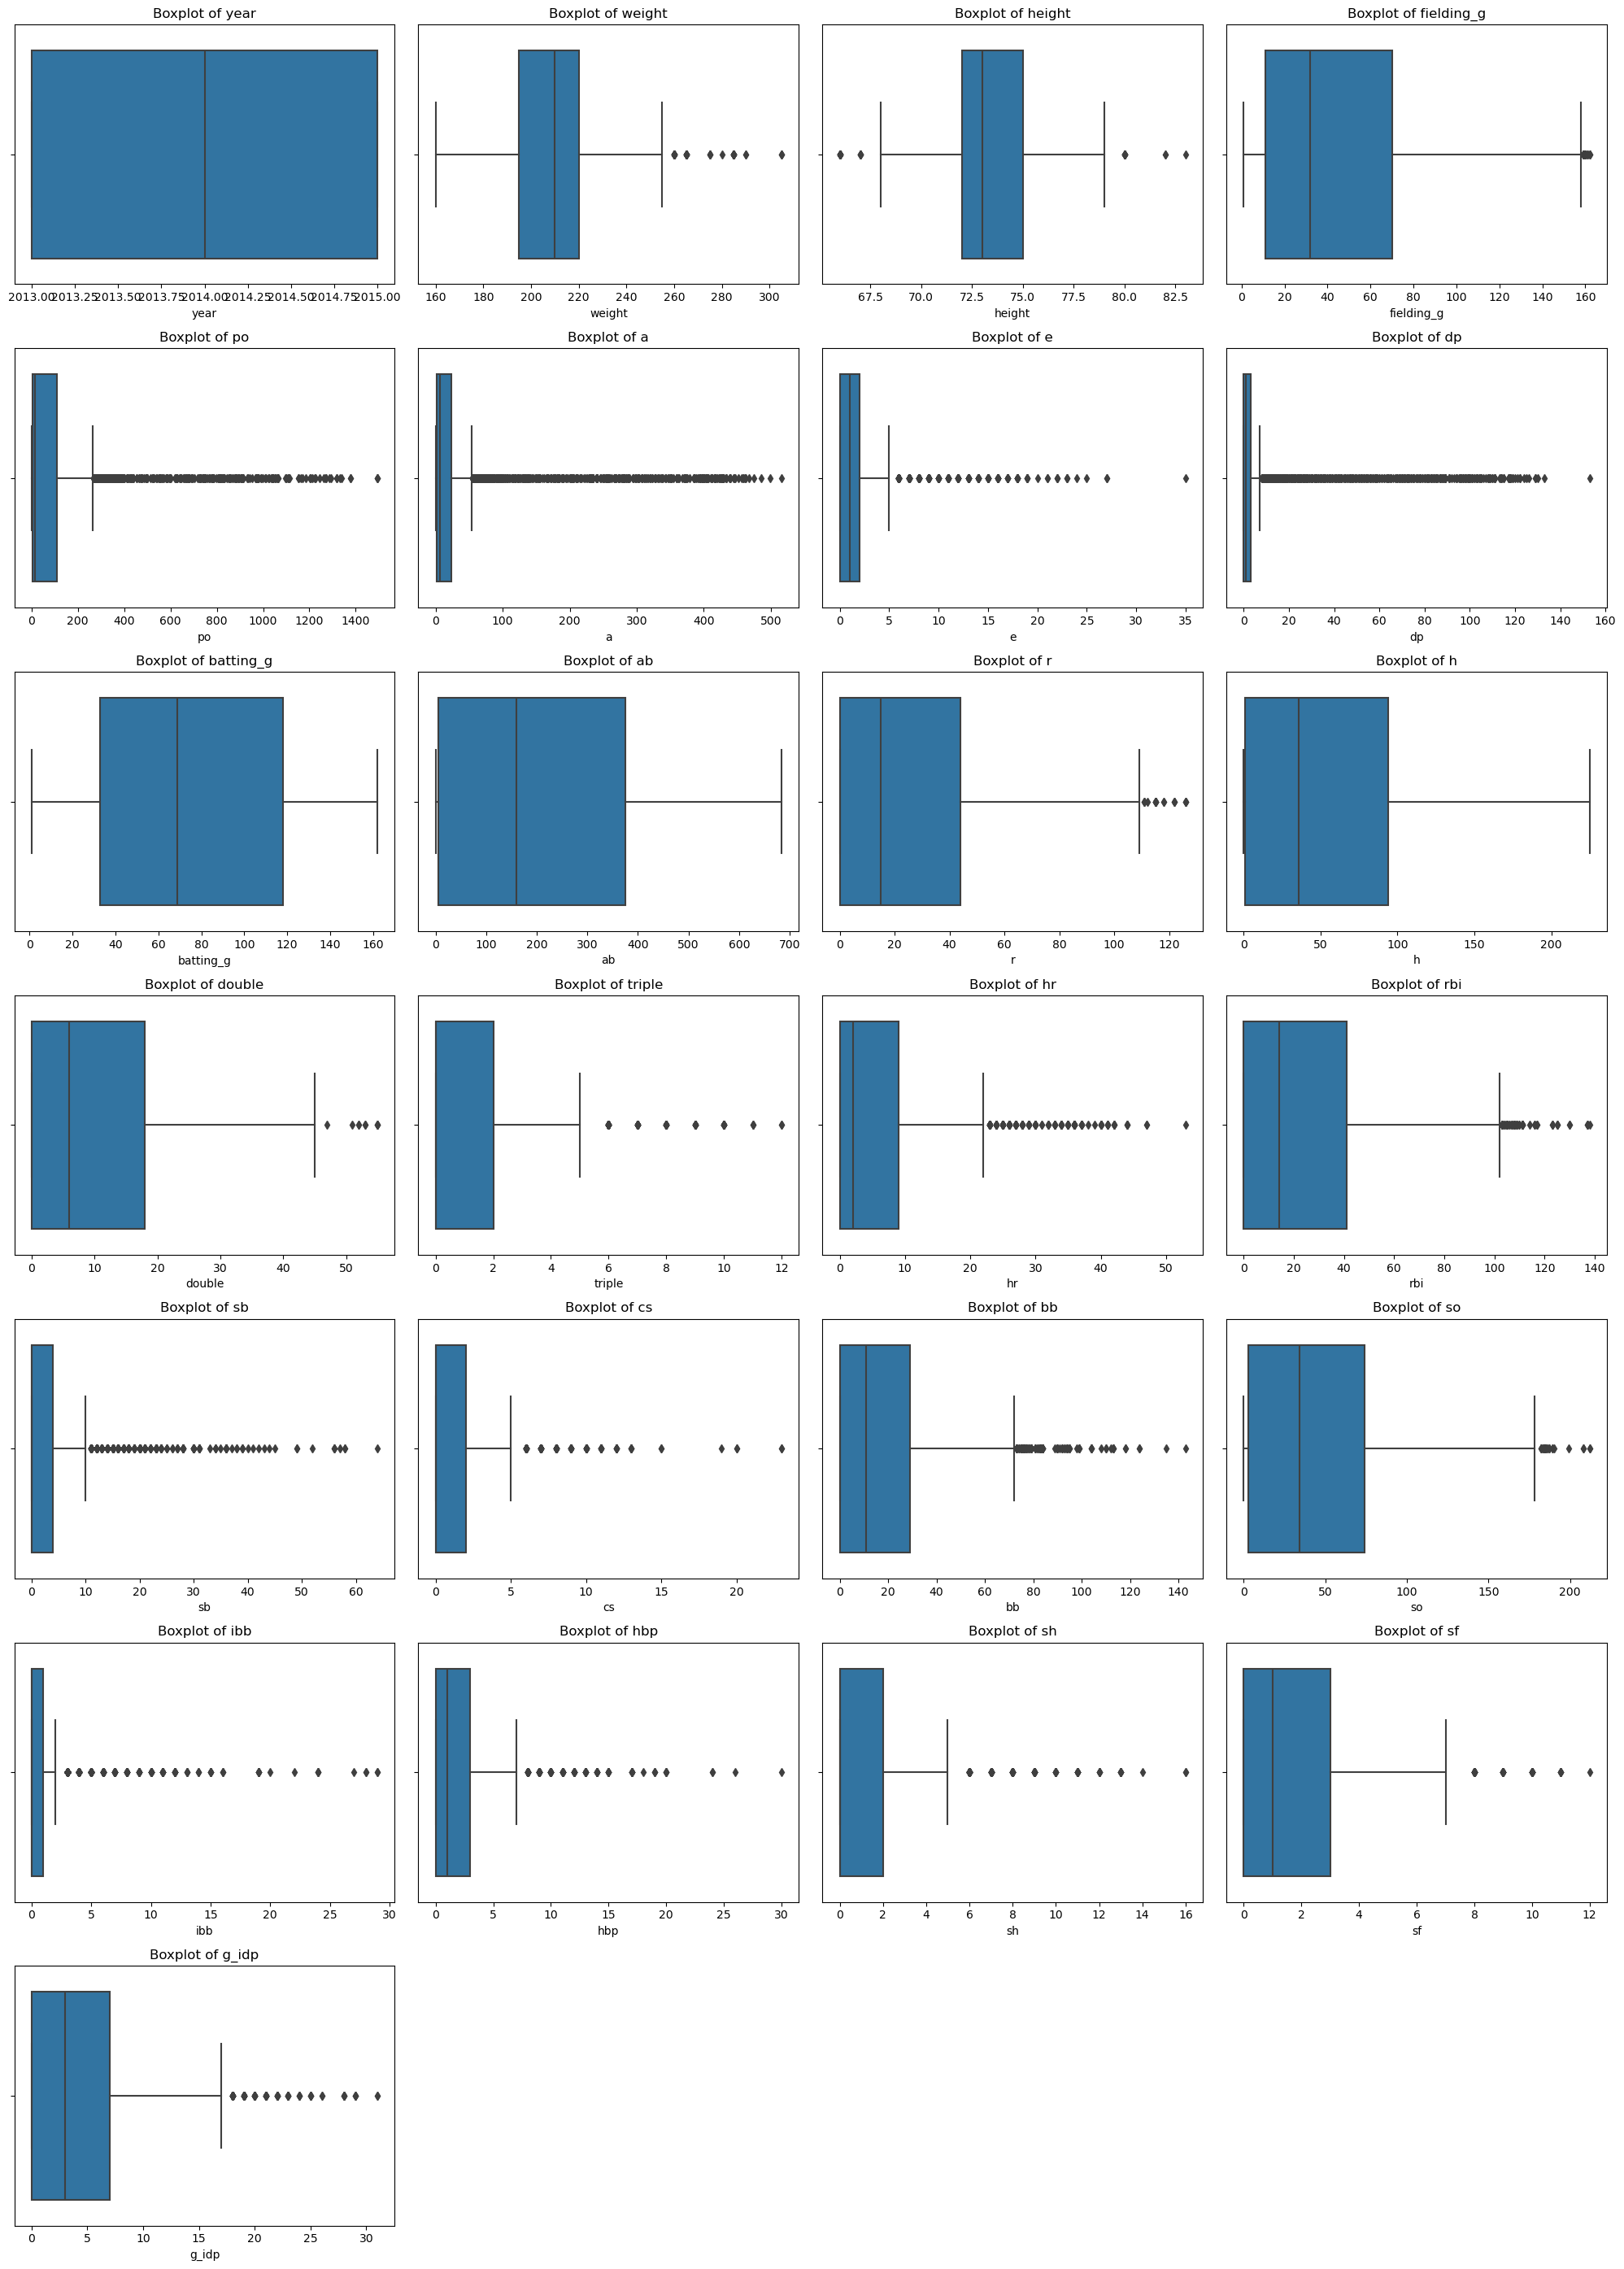

In [63]:
num_plots = len(quantitative_columns)
num_rows = (num_plots - 1) // 4 + 1  # Calculate number of rows needed, ensuring at least 1 row
num_cols = min(num_plots, 4)  # Maximum 4 columns per row

plt.figure(figsize=(5 * num_cols, 4 * num_rows))  # Adjust figsize based on the number of subplots

for i, column in enumerate(quantitative_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=final_merged[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [64]:
for column in quantitative_columns:
    final_merged_new = handle_outliers(final_merged, column)

C:\Users\dwang\AppData\Local\Temp\ipykernel_39512\1100071311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else
C:\Users\dwang\AppData\Local\Temp\ipykernel_39512\1100071311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else
C:\Users\dwang\AppData\Local\Temp\ipykernel_39512\1100071311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [65]:
final_merged_new

,year,salary,birth_country,weight,height,bats,throws,award_id,stint,pos,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,2013,10000000,USA,235.0,75.0,R,R,No award,1.0,P,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,1900000,USA,200.0,71.0,R,R,No award,1.0,2B,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
3,2013,1900000,USA,200.0,71.0,R,R,No award,1.0,OF,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
4,2013,1900000,USA,200.0,71.0,R,R,No award,1.0,SS,...,14.0,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0
5,2013,5700000,USA,240.0,76.0,R,R,No award,1.0,P,...,5.0,0.0,0.0,0.0,20.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,2015,507500,USA,210.0,71.0,R,R,No award,1.0,2B,...,16.0,0.0,1.0,19.0,40.0,0.0,1.0,0.0,1.0,3.0
4322,2015,21000000,USA,240.0,77.0,R,R,No award,1.0,OF,...,42.0,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0
4323,2015,16500000,USA,225.0,74.0,R,R,No award,1.0,P,...,3.0,0.0,0.0,0.0,18.0,0.0,0.0,5.0,0.0,0.0
4324,2015,14000000,USA,220.0,75.0,R,R,No award,1.0,1B,...,73.0,1.0,0.0,33.0,79.0,0.0,1.0,0.0,7.5,13.0


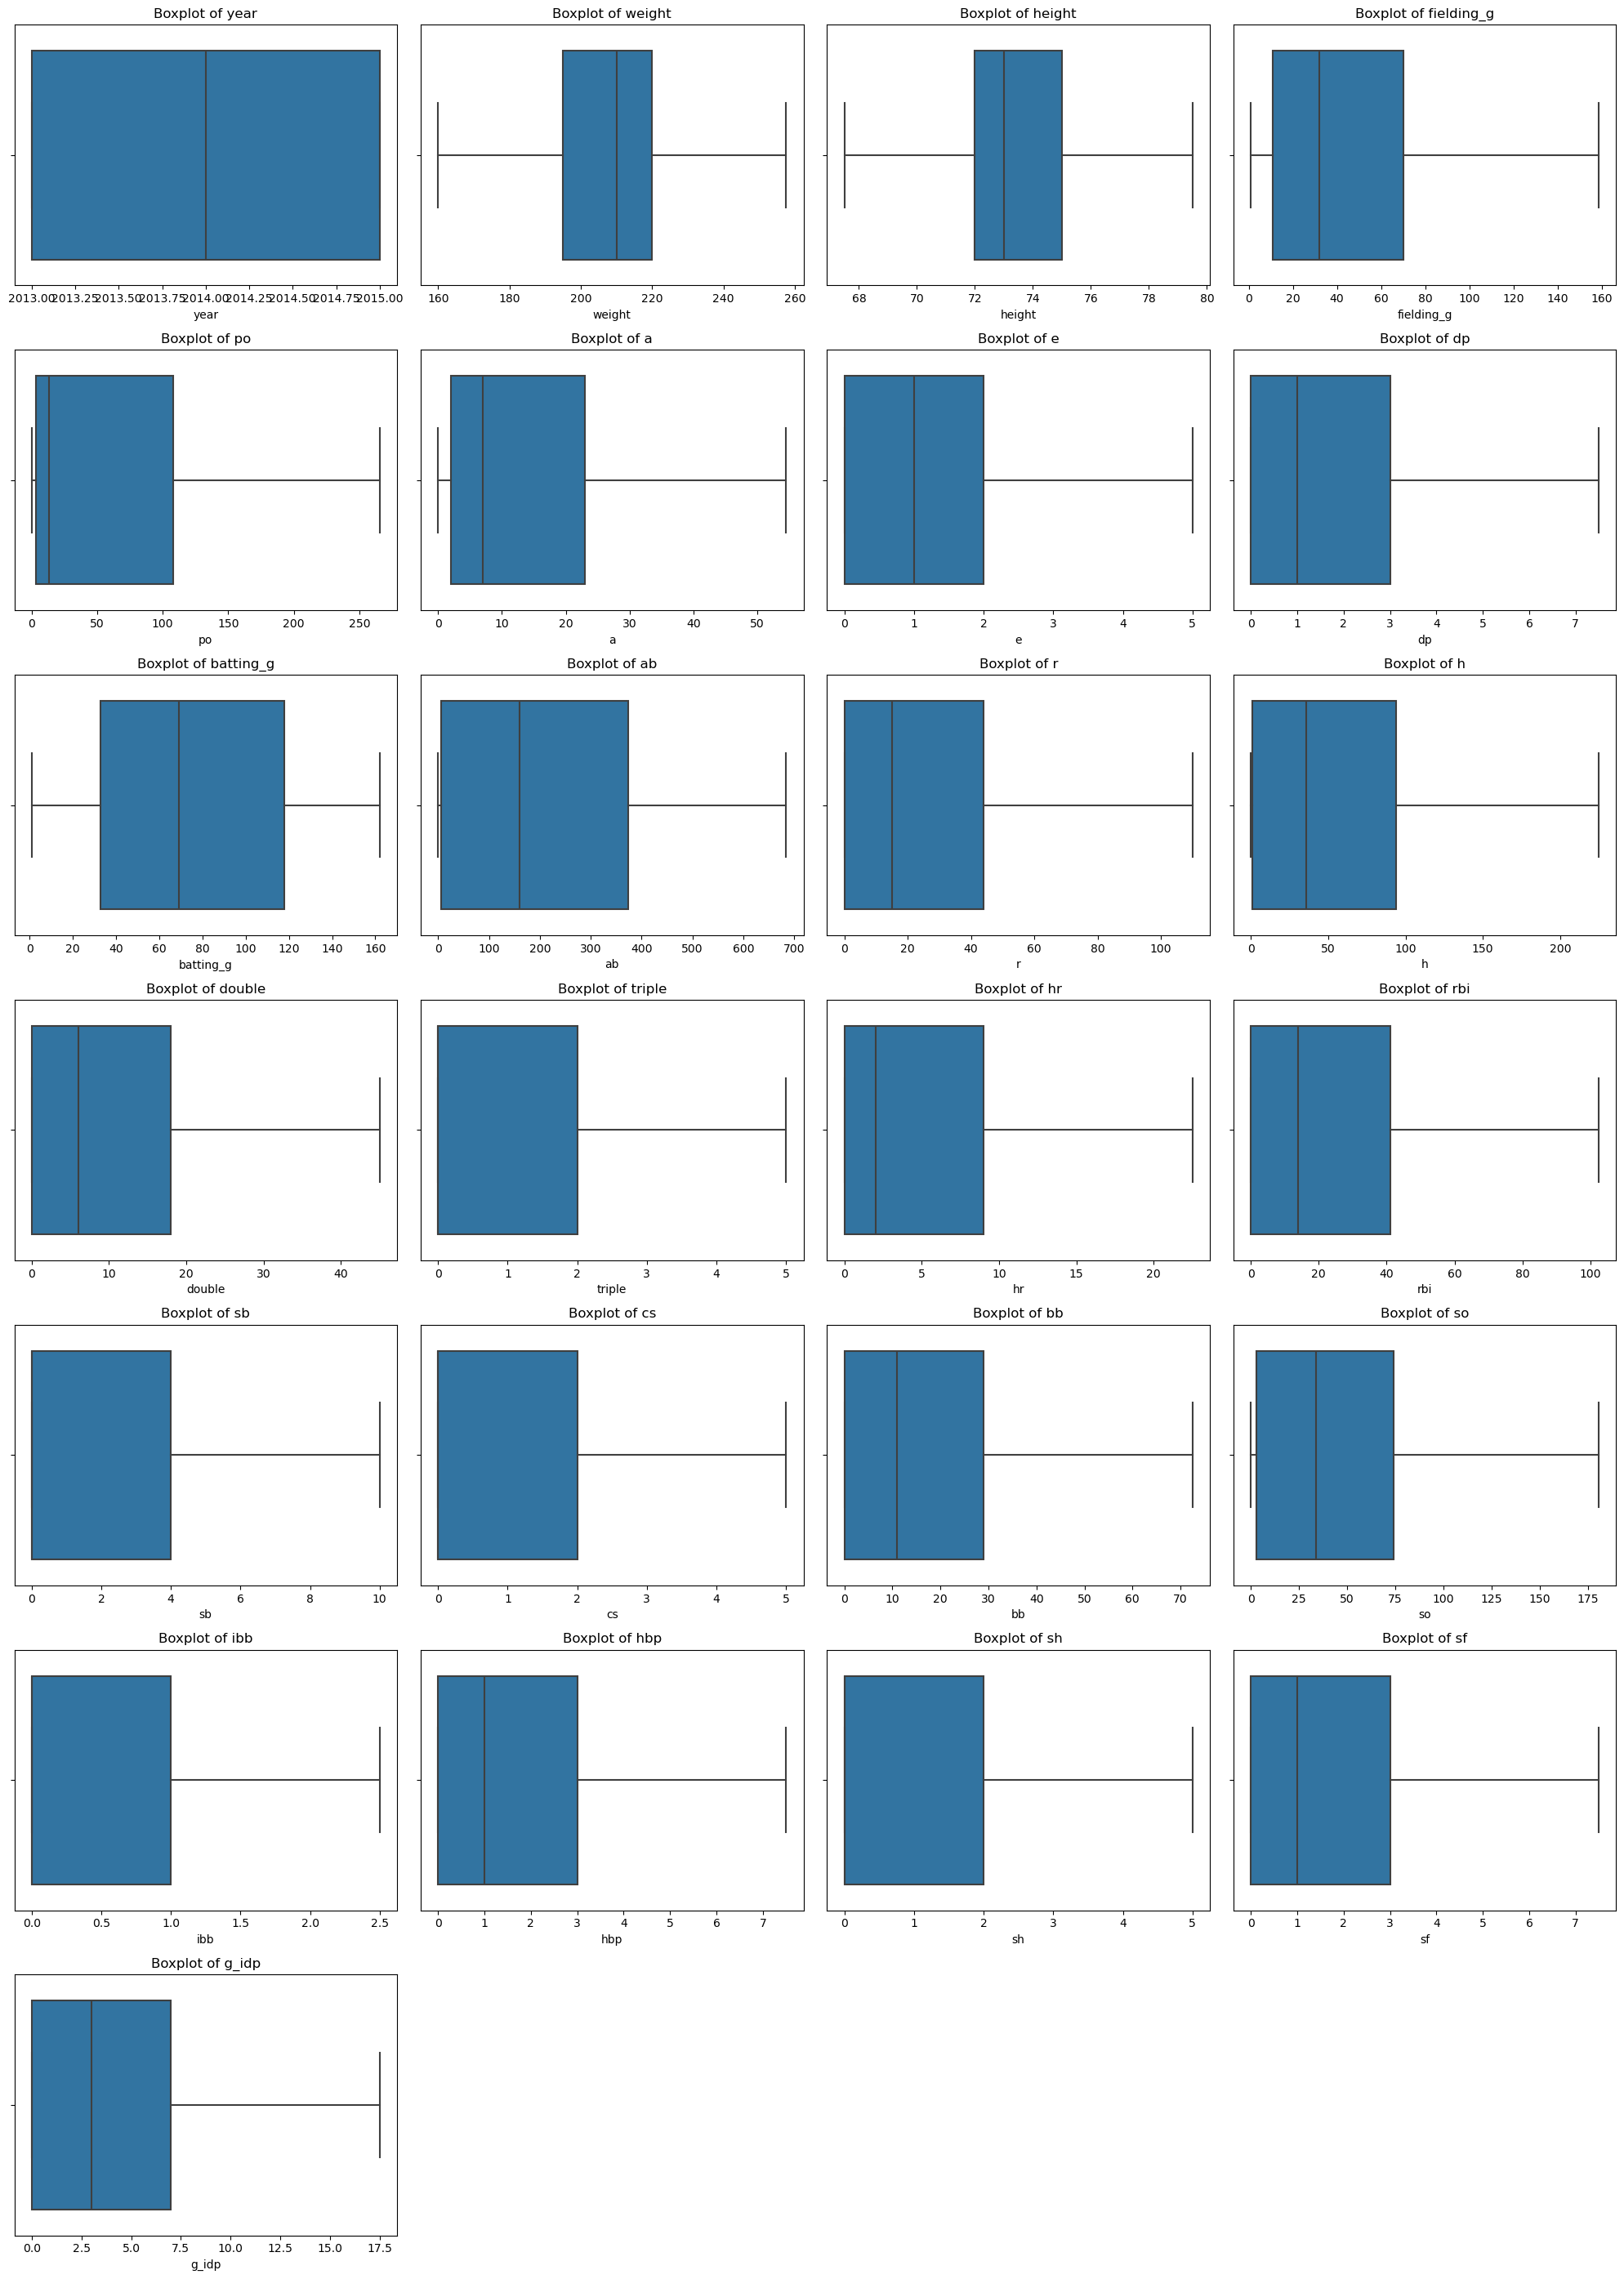

In [66]:
plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for i, column in enumerate(quantitative_columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=final_merged_new[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

* No outliers in the dataset now

#### Create the response variable

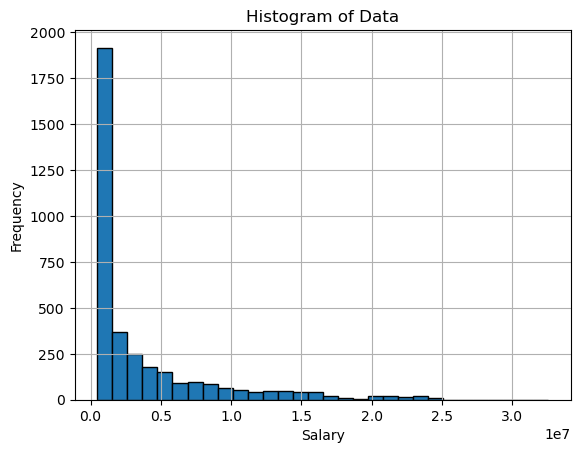

In [67]:
plt.hist(final_merged_new['salary'], bins=30, edgecolor='black') 
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.grid(True)
plt.show()

In [68]:
final_merged_new['salary'].describe()

count    3.598000e+03
mean     3.659099e+06
std      4.962856e+06
min      4.800000e+05
25%      5.120000e+05
50%      1.325000e+06
75%      4.675000e+06
max      3.257100e+07
Name: salary, dtype: float64

Create the response variable (whether the salary is high or low)

In [69]:
final_merged_new['salary_new'] = final_merged_new['salary'].apply(lambda x: 'High' if x > 1325000 else 'low')
final_merged_new = final_merged_new.drop(columns = 'salary')
final_merged_new

C:\Users\dwang\AppData\Local\Temp\ipykernel_39512\2925571792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_new['salary_new'] = final_merged_new['salary'].apply(lambda x: 'High' if x > 1325000 else 'low')


,year,birth_country,weight,height,bats,throws,award_id,stint,pos,fielding_g,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary_new
0,2013,USA,235.0,75.0,R,R,No award,1.0,P,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
1,2013,USA,200.0,71.0,R,R,No award,1.0,2B,15.0,...,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0,High
3,2013,USA,200.0,71.0,R,R,No award,1.0,OF,7.0,...,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0,High
4,2013,USA,200.0,71.0,R,R,No award,1.0,SS,9.0,...,0.0,2.0,8.0,11.0,0.0,2.0,0.0,1.0,3.0,High
5,2013,USA,240.0,76.0,R,R,No award,1.0,P,26.0,...,0.0,0.0,0.0,20.0,0.0,0.0,4.0,0.0,0.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,2015,USA,210.0,71.0,R,R,No award,1.0,2B,31.0,...,0.0,1.0,19.0,40.0,0.0,1.0,0.0,1.0,3.0,low
4322,2015,USA,240.0,77.0,R,R,No award,1.0,OF,86.0,...,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0,High
4323,2015,USA,225.0,74.0,R,R,No award,1.0,P,33.0,...,0.0,0.0,0.0,18.0,0.0,0.0,5.0,0.0,0.0,High
4324,2015,USA,220.0,75.0,R,R,No award,1.0,1B,93.0,...,1.0,0.0,33.0,79.0,0.0,1.0,0.0,7.5,13.0,High


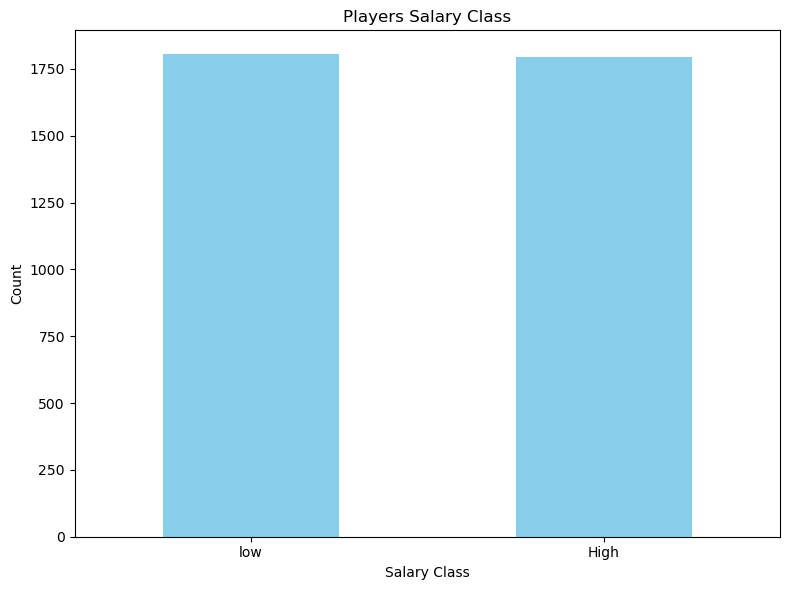

In [70]:
plt.figure(figsize=(8, 6))
final_merged_new['salary_new'].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Players Salary Class')
plt.xlabel('Salary Class')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [71]:
final_merged_new.dtypes

year               int64
birth_country     object
weight           float64
height           float64
bats              object
throws            object
award_id          object
stint             object
pos               object
fielding_g       float64
po               float64
a                float64
e                float64
dp               float64
batting_g        float64
ab               float64
r                float64
h                float64
double           float64
triple           float64
hr               float64
rbi              float64
sb               float64
cs               float64
bb               float64
so               float64
ibb              float64
hbp              float64
sh               float64
sf               float64
g_idp            float64
salary_new        object
dtype: object

In [72]:
# Convert target variable to categorical
final_merged_new['salary_new'] = pd.Categorical(final_merged_new['salary_new'])

In [73]:
final_merged_new.to_csv('final_merged.csv', index = False)

Label Encoding

In [74]:
X = final_merged_new.drop('salary_new', axis=1)
y = final_merged_new['salary_new']

In [75]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [76]:
y_binary = (y.cat.codes > 0).astype(int)

* 0 = High
* 1 = low

In [77]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [78]:
X_train.shape

(2878, 31)

In [79]:
X_test.shape

(720, 31)

In [80]:
y_test.value_counts()

1    368
0    352
Name: count, dtype: int64

### Step 4: Machine Learning Modelling

In [81]:
#### 01) Logistic Regression Model

In [82]:
lr_classifier = LogisticRegression()

In [83]:
# Fit the model on the training data
lr_classifier.fit(X_train, y_train)

C:\Users\dwang\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# Make predictions
y_pred = lr_classifier.predict(X_test)

In [85]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


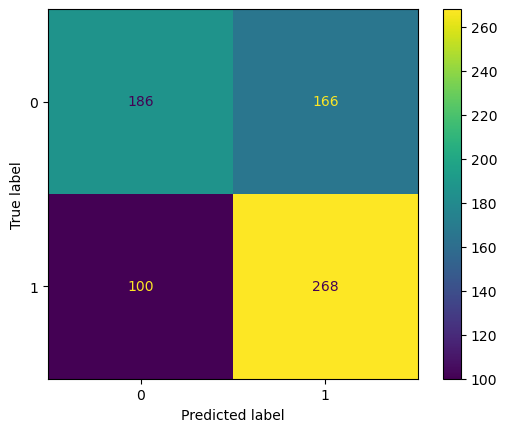

In [86]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

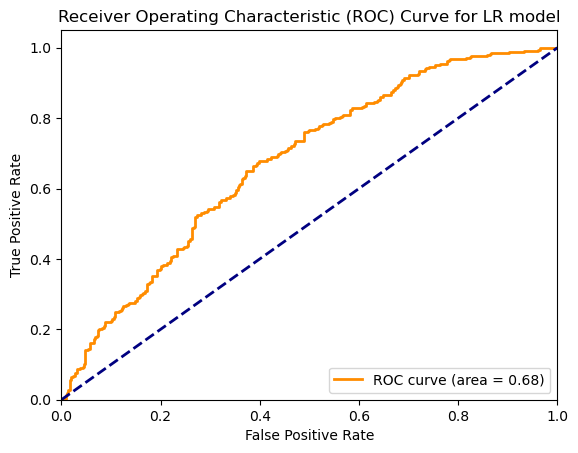

In [87]:
# ROC Curve and AUC
y_probs = lr_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LR model')
plt.legend(loc="lower right")
plt.show()

#### 02) Random forest Model

In [88]:
rf_classifier = RandomForestClassifier(random_state=123)

In [89]:
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [90]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [91]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


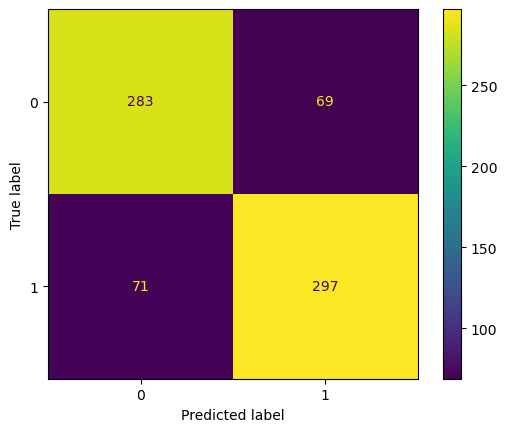

In [92]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

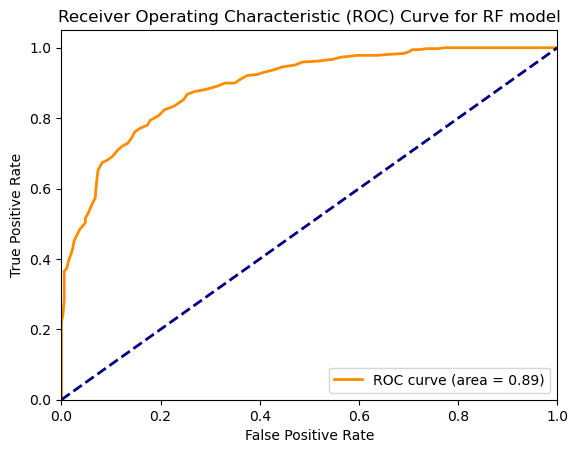

In [93]:
# ROC Curve and AUC
y_probs = rf_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RF model')
plt.legend(loc="lower right")
plt.show()

#### 03) XGBoost Model

In [94]:
xgb_classifier = xgb.XGBClassifier()

In [95]:
# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
# Make predictions
y_pred = xgb_classifier.predict(X_test)

In [97]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


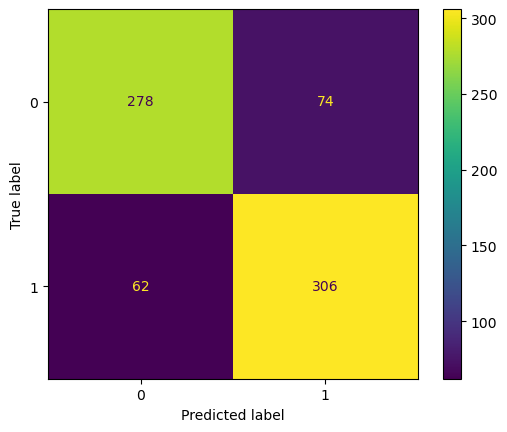

In [98]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

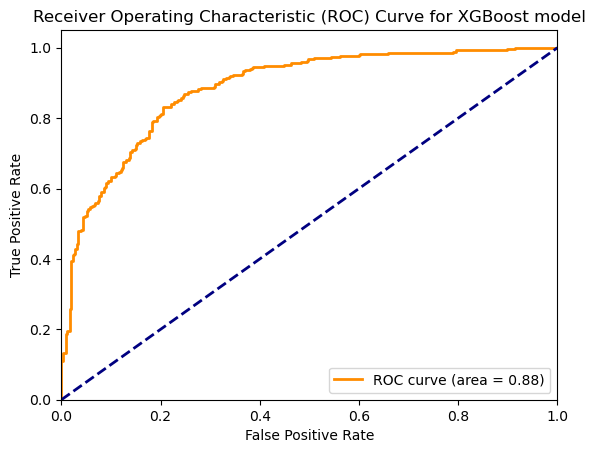

In [99]:
# ROC Curve and AUC
y_probs = xgb_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost model')
plt.legend(loc="lower right")
plt.show()

#### 04) Random Forest (Hyper parameter tuning)

In [100]:
rf_classifier_hyper = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [101]:
grid_search = GridSearchCV(estimator=rf_classifier_hyper, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [102]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
best_params = grid_search.best_params_

Best parameters found:  {'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.71


In [103]:
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [104]:
# Make predictions
y_pred = best_rf_classifier.fit(X_train, y_train).predict(X_test)

In [105]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


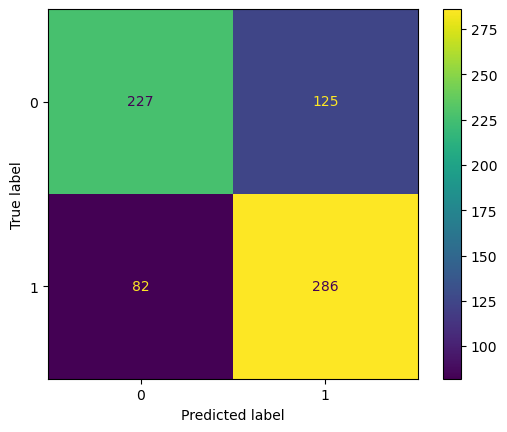

In [106]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

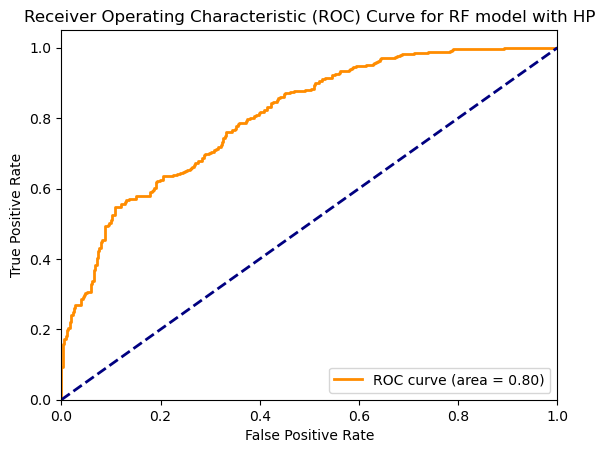

In [107]:
# ROC Curve and AUC
y_probs = best_rf_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RF model with HP')
plt.legend(loc="lower right")
plt.show()

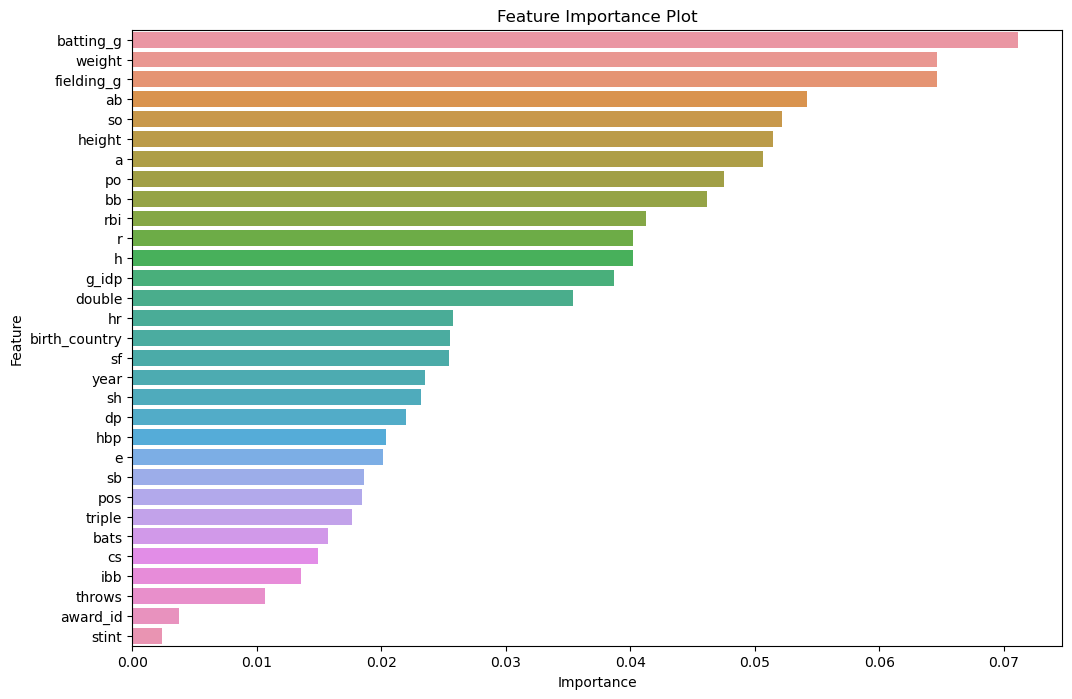

In [108]:
feature_importances = rf_classifier.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# ----------------------------------------- Report ----------------------------------------

### Introduction with Value Based Problem Statement

With the numbers to back it up, baseball is one of the leading sports in the world. For this study, we were given a database that consists of baseball-related statistics to use for the analysis. This database consists of 26 CSV files that are related to batting, fielding, pitching, and other relevant statistics. 
Out of the 26 available CSV files, 5 of the 26 CSV files were selected for analysis. Player Table, Batting table, Fielding table, Player award table and Salary table were selected for the analysis. The salaries of a player vary depending on his or her talents and other factors. Therefore, it is desired to predict the salaries of the players based on the fields in the selected tables. 

### Problem Formulation

As mentioned previously, the player table, batting table, fielding table, player award table, and salary table were selected for analysis. The Player table includes the details on players. It includes details like player id, birth information (birth day, birth year, birth place etc.), death information (death day, death year, death place etc.), weight of the player, height of the player etc. It has 18846 rows and 24 columns. The batting table consists of player id, team id, year, runs, hits, home runs and other batting-related attributes. The batting table consists of 101332 rows and 22 columns. The fielding table includes fields like player id, team id, year id, position, outs, putouts, wild pitches, etc. The number of rows in the fielding table is 170526 and the number of columns is 18 columns. The player award table includes details on the awards obtained by the players. The player award table consists of 6078 rows and 6 columns. Player id, award id, year and tie are some of the attributes presented in the player award table.  The salary table includes the team id, year, player id and salary.  The Salary table consists of 25575 rows and 5 columns.
When investigating the tables, it is obvious that the player id is common in all selected tables. The year is common in all the selected tables except in the player table. 
Therefore, a simple analysis is conducted initially to understand the dataset.

<table>
  <tr>
    <td><img src="images/image-01.png" alt="Image 1" style="width: 100%;"></td>
    <td><img src="images/image-02.png" alt="Image 2" style="width: 100%;"></td>
  </tr>
</table>

Most of the players use their right hand as the batting hand, while very few players have the ability to bat using both of their hands. Similar to the batting hand visual, most of the players use their right hand as the throwing hand. 

<table>
  <tr>
    <td><img src="images/image-03.png" alt="Image 3" style="width: 100%;"></td>
    <td><img src="images/image-04.png" alt="Image 4" style="width: 100%;"></td>
    <td><img src="images/image-05.png" alt="Image 5" style="width: 100%;"></td>
  </tr>
</table>

Then the distribution of player height and weight are examined. The weight distribution seems to have a normal distribution while the height seems to have a skewed distribution. Since the problem is stated for the salary variable, the distribution of the salary variable is examined. The salary has a right-skewed distribution. Since the salary varies with the time, the summation of the player salaries is visualized against the years.

<table>
  <tr>
    <td><img src="images/image-06.png" alt="Image 6" style="width: 100%;"></td>
  </tr>
</table>

We can see that the salary of players has increased over the years. Since the main objective of the research is to predict the salary of a given player, it is important to have recent data to use for the analysis. Since salaries have increased across the years, the salary of a player in 1985 may be far different from the salary of a player in 2015. Therefore, if all the years are considered, there could be huge variations in player salaries that may arise. Moreover, some of the players who played in the 90's may not be alive now. As a solution for that problem, only the recent year records are selected for the analysis.

Therefore, only the records of 2013, 2014 and 2015 are selected for the analysis. 
After filtering out the records the remaining number of rows in the selected tables are as follows. 

| Table      | Number of records after filtering |
|---------------|--------------------------|
| Batting table  | 4330                     |
| Fielding table   | 7490                     |
| Player award table      | 159                     |
| Salary table      | 2434                     |

Since a sufficient number of records are available for the filtered years, those filtered data are then used for the analysis.

### Data Wrangling on multiple tables

#### Extract and Create features from different tables
After finalizing the tables chosen, the next task is to select the features from each of the tables and that process is described in the section below.

**Player table:** 

The player table has records of 18846 unique players. It consists of 24 columns with respect to players' birth details, death details, names and other baseball-related attributes. Since birth details, death details and names of the players are not necessary for the analysis, it is decided to only select the baseball-related attributes of the analysis. Therefore 'player_id', 'birth_country’, ‘weight', 'height', 'bats' and 'throws' variables are selected from the batting table. Afterwards, the player table then consists of 18846 rows and 6 columns. 

**Batting table:**

The batting table consists of 22 attributes. It has player id, league id, number of runs, number of home runs obtained by a player in a given year and many other batting-related attributes. Since the variable “g” is common in both the fielding and the batting tables, the two fields in the batting table are renamed. Therefore, the vatable “g” in the batting table is renamed as “batting_g”. Then the variable “stint” is converted to the object type. 
Moreover, the missing values in the batting table are investigated and it is revealed that there are no missing values in the batting table.

**Fielding table:**

The fielding table consists of 18 columns. It contains player id, league id, team id and many other fielding-related attributes. When loading the dataset into the ipynb file, it was visible that many missing values were available in some of the fields. Some fields were completely missing.  The variables “gs” (games started), “wp” (Wild Pitches (by catchers)) and “zr” (Zone Rating) were completely null. Therefore, those columns are dropped from the analysis.  

Then the variables that have missing values for more than 50% are examined.  The percentage of the missing values for the variables “pb” (Passed Balls), “sb” (Opponent Stolen Bases) and “cs” (Opponents Caught Stealing (by catchers)) was 95.3%. Therefore, those three variables also dropped from the analysis.

After applying these operations, the fielding table consists of 7490 records and 12 columns. 
As mentioned above, the fielding table also has the same field “g” as in the batting table. Therefore, that column is renamed as “feilding_g”. 

**Player award table:**

The player award table has 6 columns which are “player id”, "league id”, “tie”,” year”, “award id” and “notes”. Firstly, we examined the missing value percentage of the columns. The missing value percentage for the variable “tie” (Award was a tie (Y or N)) was 99.25%. Therefore, the “tie” variable was dropped. Afterwards, the player award table consists of 5 columns.

**Salary table:**

This is the table which includes the response variable for the analysis. This table consists of 5 columns which are “year”, “team id”, “league id”, “player id” and “salary”. When examining for missing values, it turned out that there were no missing values in the table. Since there were no missing values in the salary table, the table is then directly used for preparing the combined dataset. 

#### Concatenate, Merge or Join the tables

After selecting the fields for the individual tables, the next task is to join the tables. The common field for all the 5 selected tables is the “player id”.  Apart from the player table, all other 4 tables have the year variable as a common variable. 

All 5 tables are merged together as follows. The methods that were used for joining were (Left join, inner join, Right join, and Outer join) and the fields used for joining and the number of rows and the number of columns in the resulting data frames are mentioned in each of the steps below.

* As the initial step, the player table and the salary table were merged together and the common field between both the tables was player id. Therefore, an inner join is performed between the two tables based on the player id. By doing this, it will select the common players in both tables. After merging the two tables the resulting table (df_merge_01) has 2426 rows and 10 columns. 

* Next, the player award table is selected to merge with the previously resulting table, df_merge_01. Afterwards, the common fields in the df_merge_01 and the player award table are player id, year and league id. The df_merge_01 table and the player award table are merged together using a left join based on the mentioned common fields, player id, year and league id. This left join will fetch records for all the rows in the df_merge_01 from the player award table. Since NaNs were there for the players who had not won any awards, NaNs were renamed as no awards. After this join the resulting table is named as df_merge_02. It has 2453 rows and 12 columns. Since one player can win more awards in a given year corresponding to a given league id, the number of records has increased compared to df_merge_01.

* Then the resulting table df_merge_02 is merged with the Fielding table. Now the common fields in both the tables are the player id, year, team id and league id. Once again, a left join was used to merge the df_merge_02 with the Fielding table using the mentioned common fields. Then the resulting table is then named as df_merge_03, which has 4327 rows and 20 columns.

* After obtaining the df_merge_03 table, it was then merged with the final table which is the batting table.  Again, the common fields between the two tables are investigated. The player id, year, team id, league id and the variable stint are identified as the common variables in both of the tables. Therefore, another left join is performed to combine both the tables. The resulting data frame is then named as df_merge_04, which has 4327 rows and 37 columns. 

The resulting data frame which is the df_merge_04 table is then used as the final data frame for the analysis. It has one response variable which is the salary variable and 36 other variables. This final data frame will then be preprocessed before applying any models, and 
the way the data frame will be preprocessed before the model fitting phase will be talked about more in the next section.

### Data Cleansing & Transformation

Data cleansing and transformation are essential steps in the data preparation process and are crucial for ensuring the accuracy and reliability of the analysis done. In this section, we will go into more detail about investigating and handling the missing values, outlier detection, and different transformations. Since the final dataset used in this analysis contains five different tables, each of which contributes unique information about players, their performance, and other relevant attributes. By carefully examining and cleaning each table, we can ensure that the final dataset is comprehensive enough to perform accurate and reliable analysis.

**Player table:**

This is the table that contains each of the player's details and will serve as a foundational dataset. It has 24 columns, which have various attributes such as birth details, physical characteristics, and career milestones. However, when taking a close look only the “player ID” and “name_lat” columns have no missing values and all the remaining columns have missing values. The table below displays the number of missing values in each column in the original player table. 

| Column Name     | Missing Values |
|-----------------|----------------|
| player_id       | 0              |
| birth_year      | 143            |
| birth_month     | 315            |
| birth_day       | 464            |
| birth_country   | 73             |
| birth_state     | 626            |
| birth_city      | 199            |
| death_year      | 9510           |
| death_month     | 9511           |
| death_day       | 9512           |
| death_country   | 9517           |
| death_state     | 9569           |
| death_city      | 9521           |
| name_first      | 39             |
| name_last       | 0              |
| name_given      | 39             |
| weight          | 871            |
| height          | 805            |
| bats            | 1191           |
| throws          | 978            |
| debut           | 193            |
| final_game      | 193            |
| retro_id        | 54             |
| bbref_id        | 1              |

Since only the 'player_id', 'birth_country', 'weight', 'height', 'bats', and 'throw' columns were selected for the final analysis, I decided to remove all the other columns in the table. The table below displays the number of missing values after removing those unwanted columns.

| Column Name   | Missing Values |
|---------------|----------------|
| player_id     | 0              |
| birth_country | 73             |
| weight        | 871            |
| height        | 805            |
| bats          | 1191           |
| throws        | 978            |

**Batting table:**

The batting table is where we have the batting performances of each player which is a critical aspect for conducting the analysis. This table includes a number of details, such as the number of runs, hits, and home runs, each of which provides valuable insights into a player’s performance. When investigating, there were missing values in some columns. The table below displays the number of missing values in each column.

| Column Name   | Missing Values |
|---------------|----------------|
| player_id     | 0              |
| year          | 0              |
| stint         | 0              |
| team_id       | 0              |
| league_id     | 737            |
| batting_g     | 0              |
| ab            | 5149           |
| r             | 5149           |
| h             | 5149           |
| double        | 5149           |
| triple        | 5149           |
| hr            | 5149           |
| rbi           | 5573           |
| sb            | 6449           |
| cs            | 28603          |
| bb            | 5149           |
| so            | 12987          |
| ibb           | 41712          |
| hbp           | 7959           |
| sh            | 11487          |
| sf            | 41181          |
| g_idp         | 31257          |

Since we will only be using the data in 2013, 2014, and 2015 for the final dataset of our analysis, after checking for missing values it dropped all missing data rows outside of the years 2013, 2014, and 2015 in the batting table.

**Fielding table:**

The fielding table is where we have the fielding performances of each player which is important for the defensive aspects in baseball. It contains 16 columns, and most of the columns have missing values. The table below displays the number of missing values in each column which was in the original fielding table. Below we can see variables like “gs”, “pb”, “wp”, “sb”, “cs”, and “zr” stand out as they have more than 50% of missing values.

| Column Name   | Missing Values |
|---------------|----------------|
| player_id     | 0              |
| year          | 0              |
| stint         | 0              |
| team_id       | 0              |
| league_id     | 1503           |
| pos           | 0              |
| fielding_g    | 0              |
| gs            | 94677          |
| inn_outs      | 68213          |
| po            | 14117          |
| a             | 14118          |
| e             | 14119          |
| dp            | 14118          |
| pb            | 159410         |
| wp            | 166337         |
| sb            | 164502         |
| cs            | 164502         |
| zr            | 166337         |

After filtering the years to only show 2013, 2014, and 2015, the table shows the number of missing values that still remain in the fielding table.

| Column Name   | Missing Values |
|---------------|----------------|
| player_id     | 0              |
| year          | 0              |
| stint         | 0              |
| team_id       | 0              |
| league_id     | 0              |
| pos           | 0              |
| fielding_g    | 0              |
| gs            | 7490           |
| inn_outs      | 3811           |
| po            | 1256           |
| a             | 1256           |
| e             | 1256           |
| dp            | 1256           |
| pb            | 7138           |
| wp            | 7490           |
| sb            | 7138           |
| cs            | 7138           |
| zr            | 7490           |

**Player Award table:**

The player award table is where we have information of the awards obtained by each player including the year, league, and any notes related to the award given. It contains 6 columns where missing values were found in only two of the columns. The table below displays the number of missing values in each column in the original award list table. Since the variable “tie” has more than 50% of missing values, that variable was removed from the original dataset.

| Column Name   | Missing Values |
|---------------|----------------|
| player_id     | 0              |
| award_id      | 0              |
| year          | 0              |
| league_id     | 0              |
| tie           | 6033           |
| notes         | 1430           |

The table below shows the number of missing values that still remain in the fielding table after filtering the years to only show 2013, 2014, and 2015. We can still see that the notes variable still has 51 missing values.

| Column Name   | Missing Values |
|---------------|----------------|
| player_id     | 0              |
| year          | 0              |
| award_id      | 0              |
| league_id     | 0              |
| notes         | 51             |

**Salary table:**

The salary table is where we have the salary details of each player throughout the different years and unlike the other tables, was complete with no missing values. This saves us time and makes it easy to deal with this table in the final dataset.

After doing the final mergings, the final dataset still had missing values for some of the columns. The table below displays the number of observations in the final merged dataset.

| Column Name   | Missing Values |
|---------------|----------------|
| year          | 0              |
| team_id       | 0              |
| league_id     | 0              |
| player_id     | 0              |
| salary        | 0              |
| birth_country | 0              |
| weight        | 0              |
| height        | 0              |
| bats          | 0              |
| throws        | 0              |
| award_id      | 0              |
| stint         | 16             |
| pos           | 16             |
| fielding_g    | 16             |
| po            | 729            |
| a             | 729            |
| e             | 729            |
| dp            | 729            |
| batting_g     | 16             |
| ab            | 16             |
| r             | 16             |
| h             | 16             |
| double        | 16             |
| triple        | 16             |
| hr            | 16             |
| rbi           | 16             |
| sb            | 16             |
| cs            | 16             |
| bb            | 16             |
| so            | 16             |
| ibb           | 16             |
| hbp           | 16             |
| sh            | 16             |
| sf            | 16             |
| g_idp         | 16             |

Since the 'notes' and 'inn_outs' variables have more than 40% missing values, I decided to remove those two columns from the data frame. The other missing values in the remaining columns were also removed from the final dataset as well, resulting in no missing value in the final dataset that will be used for the analysis. The table below displays the number of missing observations in the final data frame

| Column Name   | Missing Values |
|---------------|----------------|
| year          | 0              |
| team_id       | 0              |
| league_id     | 0              |
| player_id     | 0              |
| salary        | 0              |
| birth_country | 0              |
| weight        | 0              |
| height        | 0              |
| bats          | 0              |
| throws        | 0              |
| award_id      | 0              |
| stint         | 0              |
| pos           | 0              |
| fielding_g    | 0              |
| po            | 0              |
| a             | 0              |
| e             | 0              |
| dp            | 0              |
| batting_g     | 0              |
| ab            | 0              |
| r             | 0              |
| h             | 0              |
| double        | 0              |
| triple        | 0              |
| hr            | 0              |
| rbi           | 0              |
| sb            | 0              |
| cs            | 0              |
| bb            | 0              |
| so            | 0              |
| ibb           | 0              |
| hbp           | 0              |
| sh            | 0              |
| sf            | 0              |
| g_idp         | 0              |

When considering the outliers, it can be seen that almost all the quantitative columns have missing values. The boxplots below show how the outliers scatter in each of the quantitive variables. To find those missing values, the Interquartile Range (IQR) method was used.

For this task, a function was designed to identify and adjust outliers in a specified column of a data frame using the Interquartile Range (IQR) method. It begins by calculating the 1st quartile (Q1) and the 3rd quartile (Q3) of the column, followed by computing the IQR as the difference between Q3 and Q1. The function then determines the lower and upper bounds for outliers, defined as Q1 minus 1.5 times the IQR and Q3 plus 1.5 times the IQR, respectively. the values in the column that fall below the lower bound are replaced with the lower bound, and values above the upper bound are replaced with the upper bound. This process ensures that extreme values are adjusted to fall within a reasonable range, minimizing their impact on subsequent analyses.

<table>
  <tr>
    <td><img src="images/image-07.png" alt="Image 7" style="width: 100%;"></td>
  </tr>
</table>

After finding the missing values, the missing values were then removed using the Interquartile Range (IQR) method. Using the method, the extreme outliers were removed by replacing the values with the upper bound value, whereas the lowest outliers were replaced by a lower bound value. The boxplots below show the distribution of data after replacing the outliers.

<table>
  <tr>
    <td><img src="images/image-08.png" alt="Image 4" style="width: 100%;"></td>
  </tr>
</table>

The rigorous data cleansing and transformation process will ensure that the final dataset is not only comprehensive but also free from missing values and outliers. This clean, well-prepared dataset serves as a solid foundation for the modelling and analysis tasks that will be followed.

Before starting on the modelling task, the target variable was converted into a categorical format, and after the dependent variable selection, it was converted into an integer format.

### Machine Learning Model

Before fitting the machine learning models, the response column (salary_new) was categorized since I will be using binary classification for this problem at hand. This categorization allowed for a more straightforward interpretation of whether the salary of a player falls into a higher (> 1.325 million) or lower (< 1.325 million) category based on the given data. Then the final merged dataset was divided mainly into two parts, a training set and a testing set. The training set comprised 80% of the  dataset, containing 2,878 observations. This subset was used to train the machine learning models, allowing them to learn patterns and relationships within the data. The remaining 20%, consisting of 720 observations, was reserved as the test set.

| Dataset      | Number of observations |
|---------------|--------------------------|
| Training dataset  | 2878                     |
| Test dataset   | 720                     |

The logistic regression model was selected as the naive baseline model in this study, and the model performance of the logistic regression models is discussed below.

| Model Accuracy      | AUC value |
|---------------|--------------------------|
| 63% | 68%                  |

The results suggested that the two classes (whether the salary of the player is high or low) are not well predicted by the logistic regression model. Also, the overall accuracy of the fitted logistic model is around 63%, which is on the lower side. Not only that, the AUC value for the logistic regression model is 68%, which is also not an acceptable level. Therefore, alternative models like random forest and XGBoost were fitted to increase the model's accuracy. The table below shows the model performance of both random forest and XGBoost models.

| Model      | Model Accuracy |  AUC value |
|---------------|--------------------------|--------------------------|
| Random Forest  | 81%                     | 89%|
| XGBoost   | 81%                     |88%|

Here we can see that the random forest and the XGBoost models perform way better than the naive baseline model. The overall accuracy of both the random forest model and the XGBoost model is 81%, while the ROC curve suggested that the AUC value for the random forest model is 89% and 88% for the XGBoost model. Therefore, we can suggest that these machine-learning models perform better than the logistic regression model. Further analysis was done using those two random forests and the XGBoost models.

Since the AUC value of the random forest model is slightly better than that of the XGBoost model, the random forest model was further used to apply hyperparameter tuning. The main reason for using hyperparameter tuning is to try and increase the model's performance. The AUC and the overall accuracy values were the main evaluation metrics used to select the best predictive model. However, After applying the hyperparameter tuning for the random forest model, the results of the hyperparameter tuning process revealed that the initial Random Forest model, with default parameters, had already achieved the highest accuracy and AUC values. While the tuning process did not yield a model with better performance, it showcased the quality of the initial random forest model settings. Therefore, the random forest model without hyperparameter tuning was selected as the best model in this study. The best model performance (confusion matrix, ROC curve, and variable importance plot) is described below as follows.

<table>
  <tr>
    <td><img src="images/image-09.png" alt="Image 9" style="width: 100%;"></td>
    <td><img src="images/image-10.png" alt="Image 10" style="width: 100%;"></td>
    <td><img src="images/image-11.png" alt="Image 11" style="width: 100%;"></td>
  </tr>
</table>

According to the variable/feature importance plots, "batting_g” becomes the most important variable when predicting the salary level of a player. The second most important variable is "fielding_g” followed by, "weight",  "ab", "so”, and “height”. 

The full names of the variables are as follows:

* batting_g = Number of batting games
* fielding_g = Number of fielding games
* weight = Player's weight in pounds
* ab = At Bats
* so = Strikeouts
* height = Player's height in inches

### Summary & Further Improvements 
 
In this study, I used 5 different datasets to develop the response variable. The response variable was a categorical one that was related to the playe'sr salary. The logistic regression model was used as a statistical model, and the results suggested that the logistic regression model did not predict the player's salary level (high or low) very well. Therefore, machine learning models like random forest and XGBoost were then fitted for the data, and the results suggested that the fitted models can predict the player's salary level far better than the logistic regression model.

After that, hyperparameter tuning was done to the random forest model, but it did not help to increase the model's performance. For further improvements, maybe we can utilize different types of data tables to enhance this analysis, we can also conduct in-depth analysis using hyperparameter tuning for this dataset, which might increase the model's performance.

### Reflection

By doing this study, as we were given 26 total datasets, the main thing that I got was how we formulate a problem by using this large amount of data. In the initial stage, it was a bit hard to develop a response variable by looking at such a large amount of data. The other challenge was to select the appropriate table to formulate the problem. For that, different types of searches were done continuously, and it was found that player details, batting, fielding, salary, and award tables can be used to predict the player's salary level. Furthermore, there was another issue where I had to decide whether to move forward with either the player salary value or create a categorical level for that instead. Since the salary value range is too large, I decided to move forward by creating a new response variable using salary data. I also managed to gain knowledge on how to formulate a question/response variable using existing data.

The next challenge was to decide how many levels we had to move forward with the response variable. It can either be binary or multi-leveled. I found that the best way to select the cut-off point using salary variable statistics is to use the median value of the salaries to decide the cut-off points. For that, I have researched websites on how to select cut-off points in this kind of scenario. However, it was also quite a challenge, as I got quite a few background ideas when creating this response variable. 

The other thing is the variable selection part. In there, I did some research on baseball statistics to get more ideas on the sport of baseball. Also, the initial datasets had so many missing values that were hard to impute or delete. Deleting those large numbers of missing values reduced the number of data rows in the entire dataset. Therefore, I decided to delete those entire columns to overcome that issue, I also did some research on how to work with outliers, and for this study, first I selected outliers using the interquartile range method and replaced the outliers over the 95% level with a upper bound value and the outliers below the 25% level with a lower bound cut-off value.

The other important part of the assignment was the modelling phase. Since I already had an idea of the logistic regression model, I researched different machine-learning models and the theories behind them by doing further research on websites and watching videos on YouTube. This added knowledge has helped me a lot in the modelling phase. Also, I researched hyperparameter tuning for each machine-learning model and got an idea about how to use the grid search method when applying hyperparameter tuning. I learned about the different parameters and how they affected the model, as well as the final results.

Lastly, I experienced some new Python libraries, especially when doing the model evaluation. To add to that, I also gained some knowledge of statistical terms like accuracy, the area under the curve (AUC), and the receiver operating characteristic (ROC) curve when doing the evaluation part.
To end things off, solving this real-world problem using the given datasets has improved my statistical knowledge. Furthermore, it has helped me to understand different real-world scenarios and gives further guidance about how difficult it is and how to push through and overcome these scenarios.